# K-Means Mall Customer Segmentation

Import Libraries:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
import os
# Set environment variable to avoid memory leak issue
os.environ['OMP_NUM_THREADS'] = '1'

Load the Dataset:

In [19]:
df = pd.read_csv("C:/Users/Admin/Desktop/ML/5/Mall_Customers.csv")

Explore the Data:

In [20]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [22]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Data Preprocessing:
Handle missing values, encode categorical variables if necessary, and scale the features.

In [23]:
# Example: Assuming 'Gender' is a categorical variable
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

Feature Selection:
Select the relevant features for clustering.

In [24]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Determine the Number of Clusters (k):
Use the Elbow Method or Silhouette Score to find the optimal number of clusters.

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


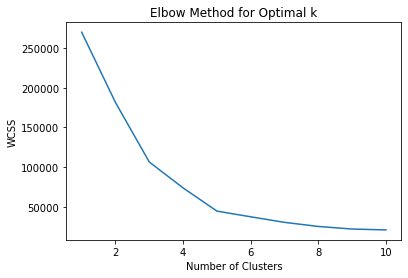

In [25]:
import os

# Set environment variable to avoid memory leak issue
os.environ['OMP_NUM_THREADS'] = '1'

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

Apply K-means Clustering:
Once you determine the optimal number of clusters (k), fit the K-means algorithm to the data.

In [12]:
k = 3  # Example: replace with the optimal number from the Elbow Method
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X)

Visualize the Clusters:
Plot the clusters to visualize the segmentation.

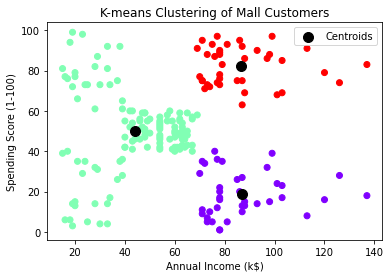

In [13]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('K-means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# **K-means Clustering:**

K-means clustering is an unsupervised machine learning algorithm used for partitioning a dataset into a set of distinct, non-overlapping groups or clusters. The goal is to group similar data points together while keeping dissimilar points in different clusters. It is a widely used method for exploratory data analysis and is particularly useful in applications such as customer segmentation, image compression, and anomaly detection.

Here's a step-by-step explanation of the K-means clustering algorithm:

1. **Initialization:**
   - Choose the number of clusters (K) that you want to divide your data into.
   - Randomly initialize K cluster centroids. These centroids are the initial mean values around which the clusters will form.

2. **Assignment:**
   - For each data point in the dataset, calculate the distance to each centroid.
   - Assign the data point to the cluster whose centroid is closest (usually using Euclidean distance).

3. **Update Centroids:**
   - Recalculate the mean of the data points within each cluster.
   - Update the cluster centroids to be the newly calculated means.

4. **Repeat:**
   - Repeat the assignment and update steps iteratively until convergence. Convergence occurs when the assignment of data points to clusters stabilizes, and centroids no longer change significantly.

5. **Final Result:**
   - The final result is a set of K clusters, where each cluster is represented by its centroid.
   - Each data point belongs to the cluster with the nearest centroid.

**Key Concepts:**

- **Centroid:** The center of a cluster, defined as the mean of all data points in the cluster.
- **Inertia/Within-Cluster Sum of Squares (WCSS):** The sum of squared distances between each data point and its assigned cluster centroid. It is often used to evaluate the quality of the clustering.

**Advantages:**
- Simple and easy to implement.
- Scales well to large datasets.

**Limitations:**
- Requires the number of clusters (K) to be specified in advance.
- Sensitive to the initial placement of centroids, and results may vary with different initializations.
- Assumes clusters are spherical and equally sized, which may not always be the case.

K-means clustering is a foundational algorithm in machine learning and is widely used in various fields for grouping and analyzing data.